In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
from numpy.random import RandomState
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, cross_val_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV 
from sklearn import svm
import warnings
warnings.filterwarnings("ignore")

In [19]:
df = pd.read_csv("trainReduzido.csv")
df = df.drop(['Unnamed: 0'], axis='columns')
df = df.to_numpy()

In [28]:
y_all = df[:,0]
x_all = df[:,1:]
N_labels = len(set(y_all))

array([1, 1, 1, ..., 7, 7, 7])

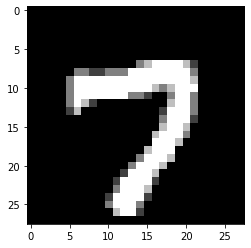

In [35]:
first_image = x_all[-1,:]
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [41]:
num_components = 784
pca = PCA(n_components=num_components)
pca.fit(x_all)
x_all_transformed = pca.transform(x_all)
print(x_all_transformed.shape)
explained_variance = pca.explained_variance_

(13017, 784)


Text(0.5, 1.0, 'Explained Variance vs PC')

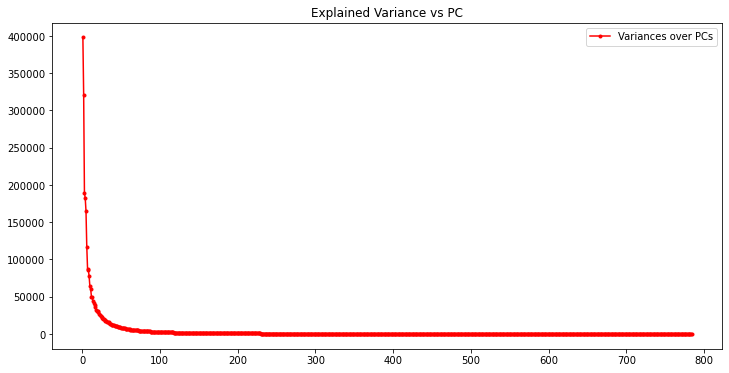

In [42]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.linspace(1,num_components,num_components), explained_variance,'r', marker='.', label="Variances over PCs")
ax.legend()
ax.set_title('Explained Variance vs PC')

In [56]:
num_components = 60
pca = PCA(n_components=num_components)
pca.fit(x_all)
x_all_pca = pca.transform(x_all)
print(x_all_pca.shape)
explained_variance = pca.explained_variance_

(13017, 60)


Text(0.5, 1.0, 'Explained Variance vs PC')

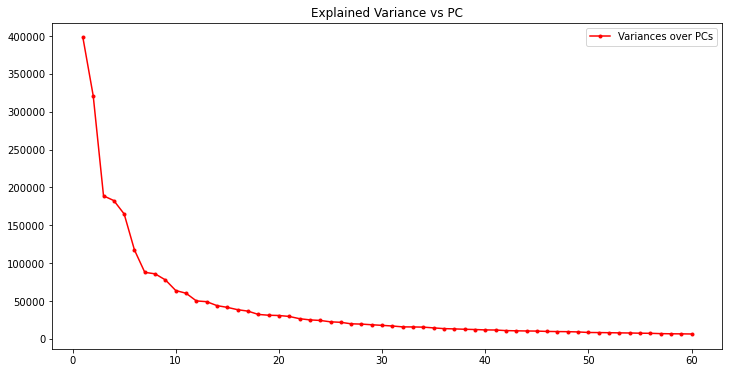

In [57]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.linspace(1,num_components,num_components), explained_variance,'r', marker='.', label="Variances over PCs")
ax.legend()
ax.set_title('Explained Variance vs PC')

In [58]:
# SVM application
parameters = {'C':range(1, 15)}
y = y_all
svc = svm.SVC(kernel="rbf", gamma='scale')
clf = GridSearchCV(svc, parameters, scoring='accuracy', refit=True, cv=10, verbose=3)  #To see results for each C just add: verbose=3
# Run fit with all sets of parameters.
clf.fit(x_all_pca, y)

Fitting 10 folds for each of 14 candidates, totalling 140 fits
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................. C=1, score=0.993, total=   1.0s
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] ................................. C=1, score=0.992, total=   1.0s
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


[CV] ................................. C=1, score=0.994, total=   1.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.994, total=   1.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.991, total=   0.9s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.992, total=   0.9s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.996, total=   1.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.995, total=   1.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.996, total=   1.0s
[CV] C=1 .............................................................
[CV] .

[CV] ................................. C=7, score=0.994, total=   0.9s
[CV] C=7 .............................................................
[CV] ................................. C=7, score=0.992, total=   1.0s
[CV] C=7 .............................................................
[CV] ................................. C=7, score=0.995, total=   0.9s
[CV] C=7 .............................................................
[CV] ................................. C=7, score=0.994, total=   1.0s
[CV] C=7 .............................................................
[CV] ................................. C=7, score=0.992, total=   0.9s
[CV] C=7 .............................................................
[CV] ................................. C=7, score=0.993, total=   0.9s
[CV] C=7 .............................................................
[CV] ................................. C=7, score=0.996, total=   0.9s
[CV] C=7 .............................................................
[CV] .

[CV] ................................ C=12, score=0.996, total=   0.9s
[CV] C=12 ............................................................
[CV] ................................ C=12, score=0.996, total=   0.9s
[CV] C=13 ............................................................
[CV] ................................ C=13, score=0.995, total=   0.9s
[CV] C=13 ............................................................
[CV] ................................ C=13, score=0.992, total=   0.9s
[CV] C=13 ............................................................
[CV] ................................ C=13, score=0.995, total=   0.9s
[CV] C=13 ............................................................
[CV] ................................ C=13, score=0.994, total=   0.9s
[CV] C=13 ............................................................
[CV] ................................ C=13, score=0.992, total=   0.9s
[CV] C=13 ............................................................
[CV] .

[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:  2.1min finished


GridSearchCV(cv=10, estimator=SVC(), param_grid={'C': range(1, 15)},
             scoring='accuracy', verbose=3)

In [59]:
C = clf.best_params_
score = clf.best_score_
print("The best accuracy average was " + str(score) + " and was achieved for " + str(C) )

The best accuracy average was 0.9946228294198838 and was achieved for {'C': 8}


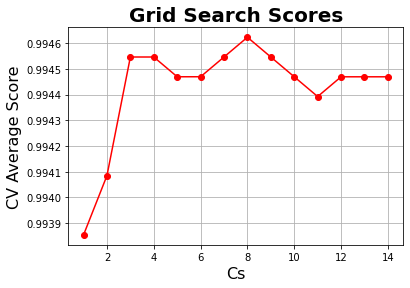

In [60]:
def plot_grid_search(cv_results, grid_param_1, name_param_1):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean)

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd)

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    ax.plot(grid_param_1, scores_mean[:], '-o', color="red")

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.grid('on')

# Calling Method 
Cs = np.arange(1,15)
plot_grid_search(clf.cv_results_, Cs, 'Cs')

In [61]:
C = 8
acc = np.zeros(10)
    
for i in range(10):
    # Separate data between training and test:
    X_train, X_test, y_train, y_test = train_test_split(x_all_pca, y_all, test_size=0.3)
    clf = svm.SVC(kernel="rbf", gamma='scale', C=C)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc[i] = accuracy_score(y_test, y_pred)

print("\nAcurácia média para modelo considerando " + str(num_components) + " features: " + '{:.3f}'.format(acc.mean()) + " +/- " + '{:.3f}'.format(acc.std()))


Acurácia média para modelo considerando 60 features: 0.994 +/- 0.001



Acc: 0.9938556067588326


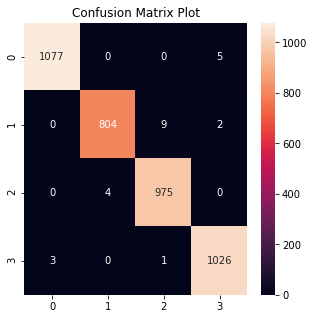

In [62]:
df_confusion = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))         # Sample figsize in inches
sns.heatmap(df_confusion, annot=True, ax=ax, fmt='g')
plt.title('Confusion Matrix Plot')
    
#plot_confusion_matrix(df_confusion)
print("\nAcc: " + str(accuracy_score(y_test,y_pred)))

In [65]:
df_trab = pd.read_csv("validacao.csv")
df_trab = df_trab.to_numpy()
df_trab

array([[   1,    0,    0, ...,    0,    0,    0],
       [   3,    0,    0, ...,    0,    0,    0],
       [  13,    0,    0, ...,    0,    0,    0],
       ...,
       [9592,    0,    0, ...,    0,    0,    0],
       [9613,    0,    0, ...,    0,    0,    0],
       [9630,    0,    0, ...,    0,    0,    0]])